# Viscoelasity - GSM model

## Imports

In [1]:
import seaborn as sns
import datetime
now = datetime.datetime.now

from keras import optimizers
from keras import losses
from matplotlib import pyplot as plt

# plt.rcParams['text.usetex'] = True
sns.set_style('darkgrid')

2025-01-31 14:24:44.212560: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-31 14:24:44.216902: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-31 14:24:44.227307: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738329884.247748  116625 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738329884.252914  116625 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-31 14:24:44.272721: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
from src.plots import plot_model_pred, plot_loss
from src.data import generate_data_harmonic, generate_data_relaxation
from src.gsm import GSMModel

## Settings

In [3]:
E_infty = 0.5
E = 2
eta = 1
n = 100

In [4]:
As = [1,1,2]
omegas = [1,2,3]

eps, eps_dot, sig, dts = generate_data_harmonic(E_infty, E, eta, n, omegas, As)

2025-01-31 14:24:47.602707: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


## Train Model

2025-01-31 14:24:47.728575


/home/argo/envs/tf_env/lib/python3.11/site-packages/keras/src/layers/layer.py:393: UserWarning: `build()` was called on layer 'gsm_layer', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


it took 0:02:52.197881 (sec) to calibrate the model


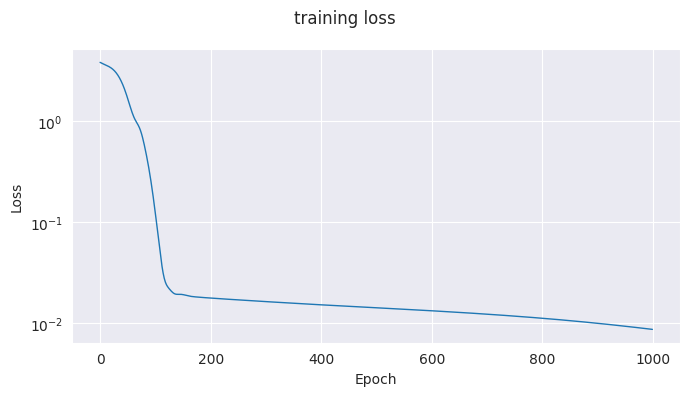

In [5]:
gsm_model = GSMModel([16, 1], ['softplus', 'linear'])
gsm_model.compile(
    optimizer=optimizers.Adam(learning_rate=0.01),
    loss=losses.MeanSquaredError()
)

t1 = now()
print(t1)
h = gsm_model.fit([eps, dts], [sig], epochs=1000, verbose=0)
t2 = now()
print('it took', t2 - t1, '(sec) to calibrate the model')
plot_loss(h.history['loss'], suptitle='training loss')

## Plot Evaluation

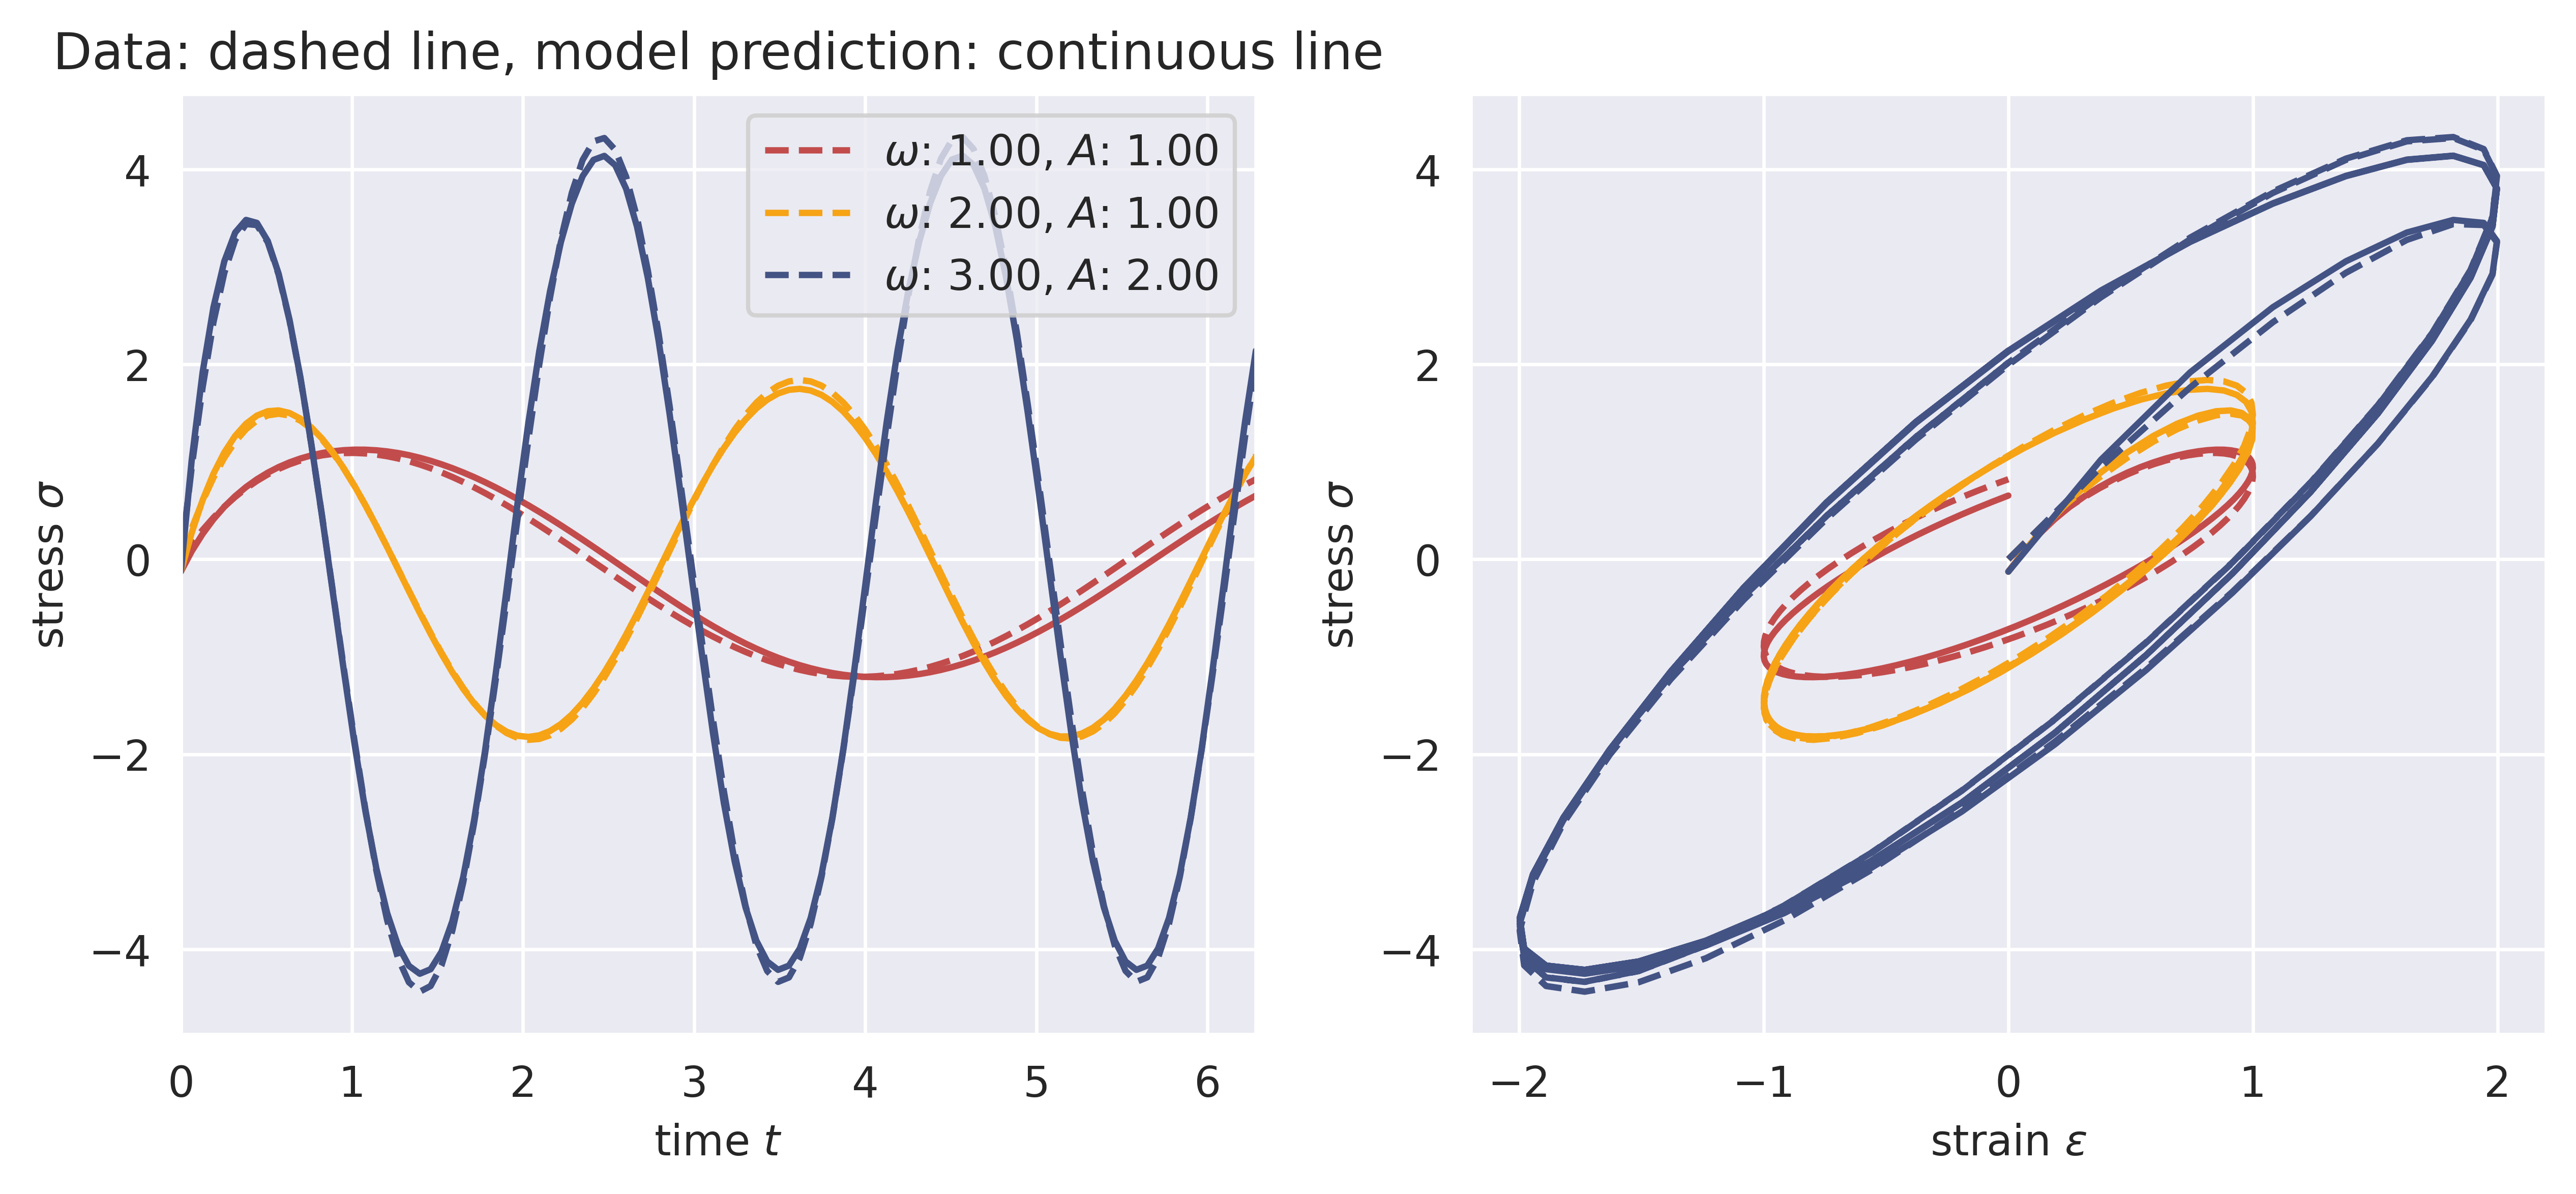

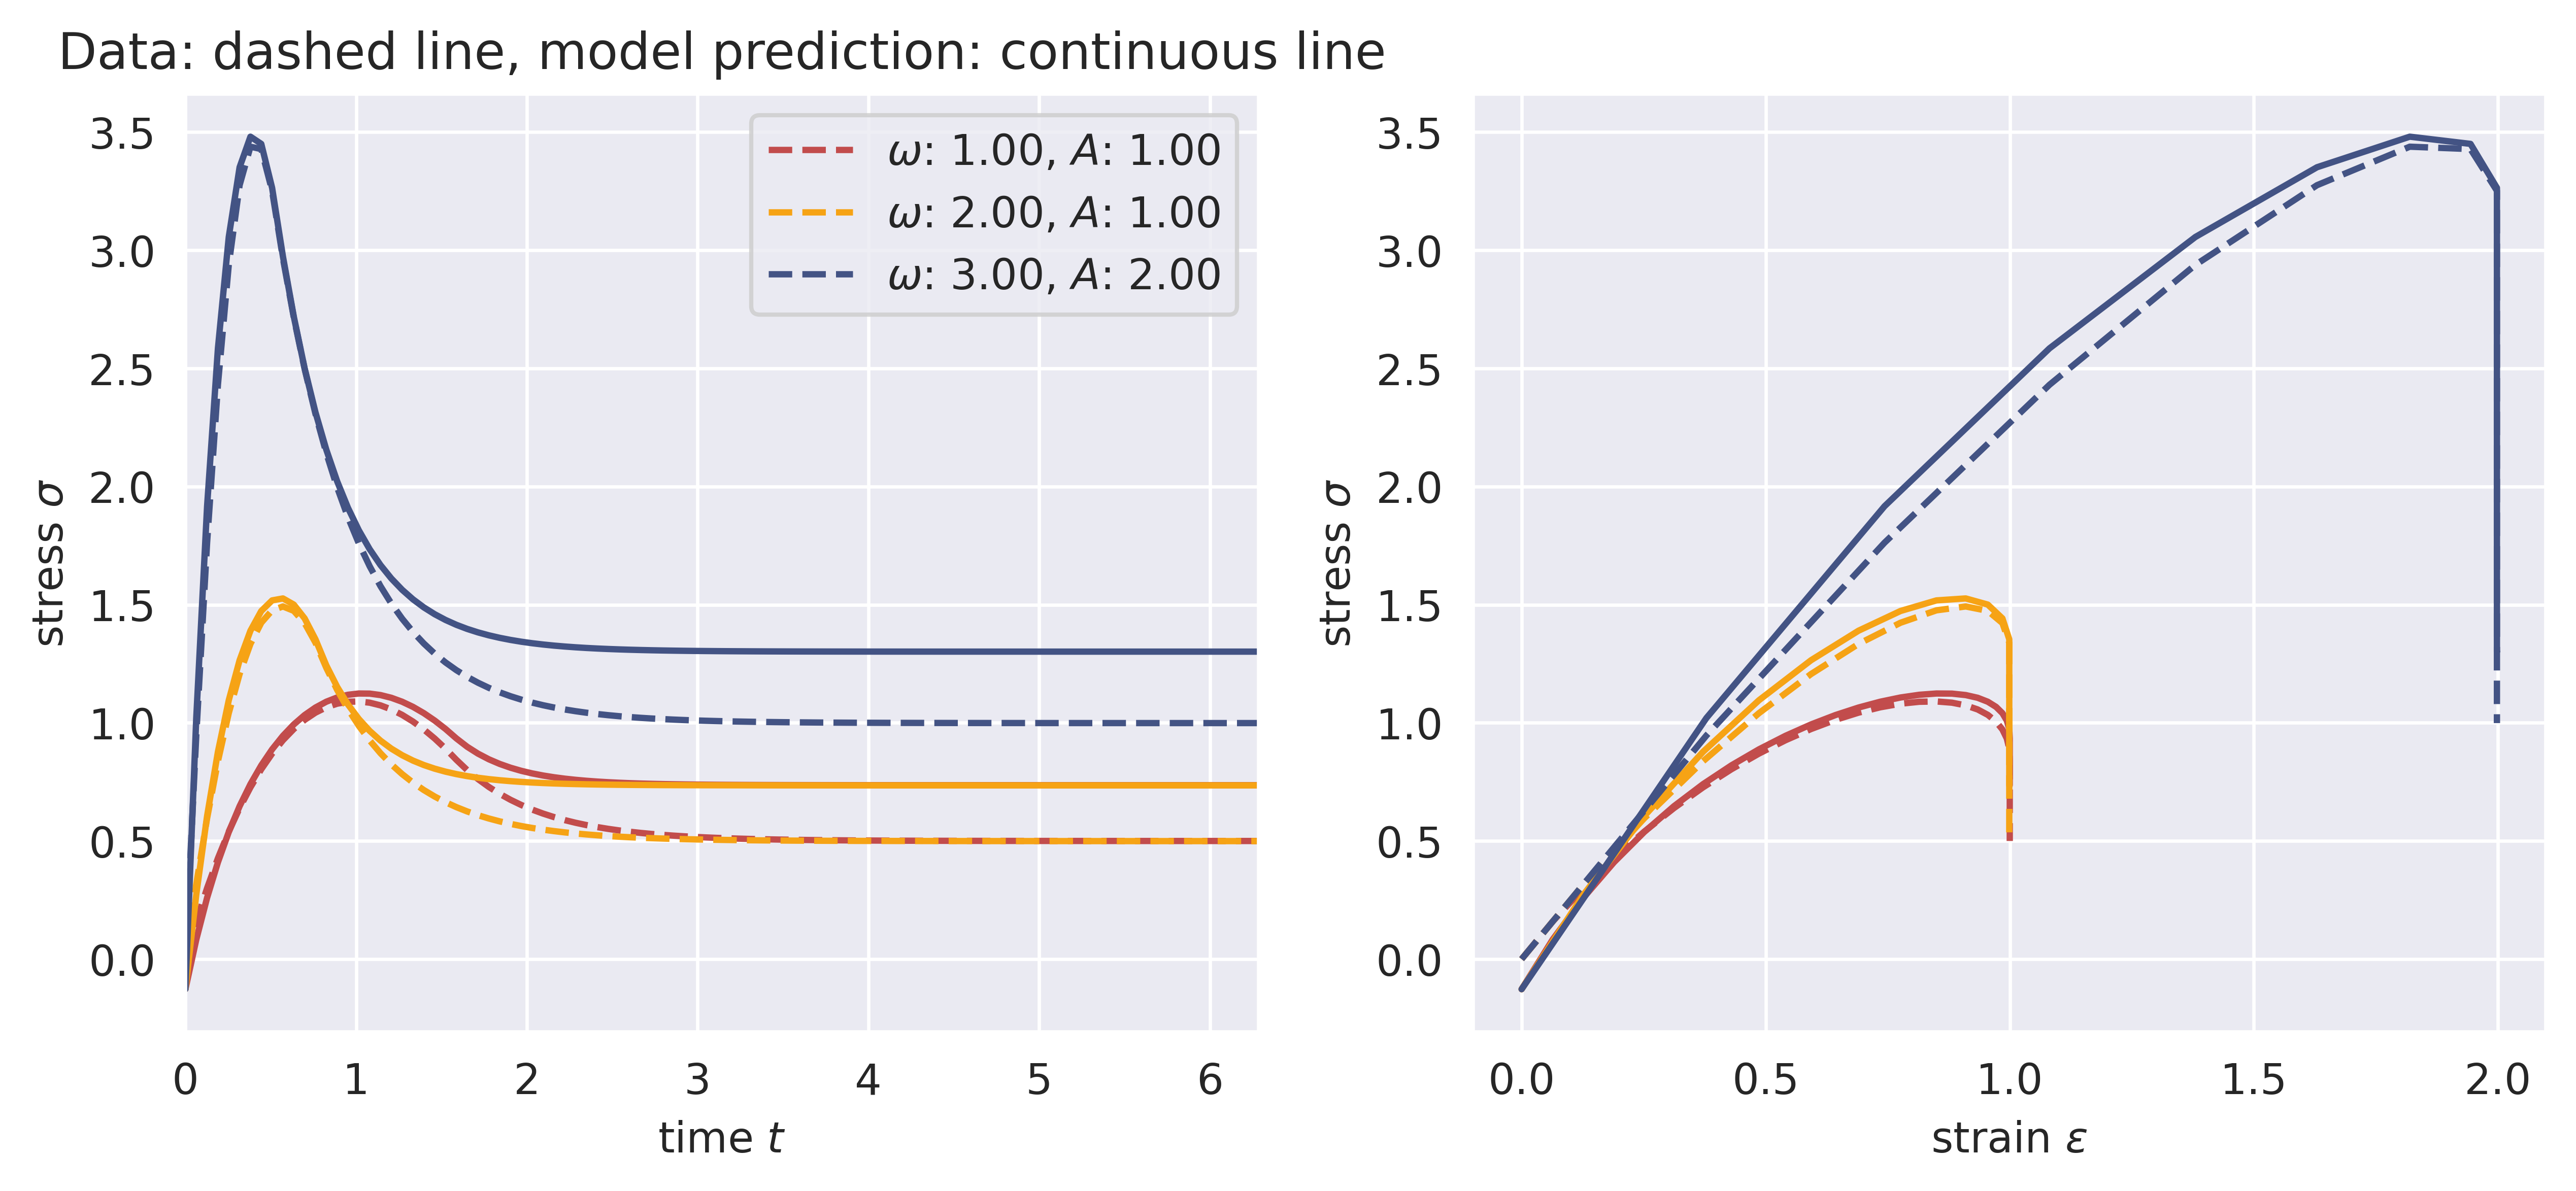

In [6]:

As = [1,1,2]
omegas = [1,2,3]

eps, eps_dot, sig, dts = generate_data_harmonic(E_infty, E, eta, n, omegas, As)
sig_m = gsm_model([eps, dts])
# plot_data(eps, eps_dot, sig, omegas, As)
plot_model_pred(eps, sig, sig_m, omegas, As)


eps, eps_dot, sig, dts = generate_data_relaxation(E_infty, E, eta, n, omegas, As)
sig_m = gsm_model([eps, dts])
# plot_data(eps, eps_dot, sig, omegas, As)
plot_model_pred(eps, sig, sig_m, omegas, As)